# Building an Artificial Neural Network using Tensorflow 2.0

We will use the fashion mnist dataset in tensorflow keras

## Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from sklearn.metrics import confusion_matrix, classification_report

## Load the Dataset

In [2]:
(features_train, target_train), (features_test, target_test) = fashion_mnist.load_data()

In [3]:
# We will check the shapes
print(f"Training data shape - {features_train.shape}")
print(f"Test data shape - {features_test.shape}")
print(f"Target train data shape - {target_train.shape}")
print(f"Target test data shape - {target_test.shape}")

Training data shape - (60000, 28, 28)
Test data shape - (10000, 28, 28)
Target train data shape - (60000,)
Target test data shape - (10000,)


In [4]:
# Each of this is a numpy array
type(features_train)

numpy.ndarray

In [5]:
# Check the first element
features_train[0]  # Each image is a 28 x 28 pixels image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Do some visualizations

To verify that the data is in the correct format and that you’re ready to build and train the network, let’s display the first 25 images from the training set and display the class name below each image.

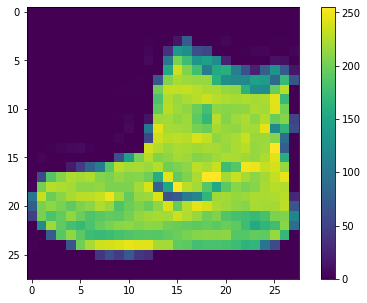

In [6]:
# We will try to visualize the image
plt.figure(figsize=(8, 5))
plt.imshow(features_train[0])
plt.colorbar()
plt.show()

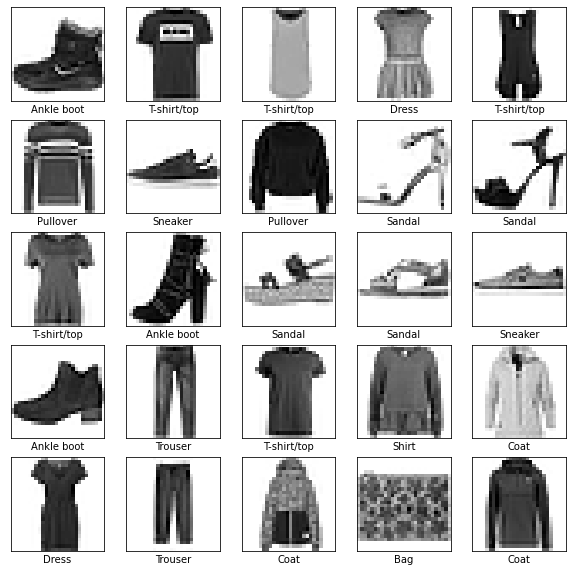

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features_train[index], cmap=plt.cm.binary)
    plt.xlabel(class_names[target_train[index]])

plt.show()

## Normalizing the images

In [8]:
# We want all our pixel values to be between 0 and 1 (normalized) in order for the neural net to train faster
features_train = features_train/255.0
features_test = features_test/255.0

## Reshaping the dataset

In [9]:
# remember the training set is a 3-D tensor, where the first dimension gives the index of the images and the other
# two dimensions are the dimensions of the arrays which contain the pixels of the images (length and width)
features_train.shape

(60000, 28, 28)

And so what we want to do now is flatten basically every image meaning we’re going to transform each of the dimensions of the image for all the images of the array by flattening all the pixels into a single one vector and we will do that through reshape

In [10]:
# -1 stands for all elements (all elements of the first dimensions will be taken) - all images
features_train = features_train.reshape(-1, features_train.shape[1]*features_train.shape[2])
features_train.shape

(60000, 784)

In [11]:
# We will reshape the test features in the similar manner
features_test = features_test.reshape(-1, features_test.shape[1]*features_test.shape[2])
features_test.shape

(10000, 784)

In [12]:
# We will check the first element of the flatted / reshaped training set
features_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Building the Artificial Neural Network

### Defining the model

In [13]:
# The model would be completely sequential - series of neurons connected
model = tf.keras.models.Sequential()

2022-07-15 19:34:13.648454: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Adding the first fully connected hidden layer**
Hidden Layer hyper-parameters:
number of units/neuron - 128
activation function - ReLu
input_shape - (784, )

In [14]:
# Some Global Model Constants

HIDDEN_LAYER_UNITS = 128
OUTPUT_LAYER_UNITS = 10
HIDDEN_LAYER_ACTIVATION_FUNCTION = tf.nn.relu
OUTPUT_LAYER_ACTIVATION_FUNCTION = tf.nn.softmax
INPUT_SHAPE = (784, )
DROPOUT_RATE = 0.2
OPTIMIZER_FUNCTION = tf.keras.optimizers.Adam()
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
ACCURACY_METRICS = ['accuracy']

In [15]:
model.add(tf.keras.layers.Dense(units=HIDDEN_LAYER_UNITS, activation=HIDDEN_LAYER_ACTIVATION_FUNCTION, input_shape=INPUT_SHAPE))

#### Adding a Dropout Layer
Dropout is a Regularization technique where we randomly set neurons in a layer to zero. In this way, while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [16]:
model.add(tf.keras.layers.Dropout(DROPOUT_RATE))

### Adding the second layer / Output Layer

- units - number of classes (10 in the Fasion MNIST dataset)
- activation - Sparse softmax (categorical) crossentropy <br>
We’re actually using the soft Max activation function in order to get probabilities for each of the class.

In [17]:
model.add(tf.keras.layers.Dense(units=OUTPUT_LAYER_UNITS, activation=OUTPUT_LAYER_ACTIVATION_FUNCTION))

### Compiling the Model
compiling the model means we need to connect it to an optimizer and chose a loss function.
optimiser will update the weights during stochastic gradient descent when back propagating and minimise the loss function

In [18]:
model.compile(optimizer=OPTIMIZER_FUNCTION, loss=LOSS_FUNCTION, metrics=ACCURACY_METRICS)

In [19]:
# Check the model now
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


So all parameters we have this all number of parameters that's interesting and that corresponds to all the weights inside your neural network. Then trainable parameters you know meaning the parameters you can update through the training. In other words the weights are the same because indeed in our new network we don't have any hyper parameter you know hyper parameter is something that is not obtained through the training but which you can tune then by experimenting several trainings of your neural network. But here we don't have any anyway and there we go yes non trainable parameters these are the hyper parameters zero.

## Introducing Callbacks

Training will stop, when specific threshold is reached

In [20]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs=None):
        if logs is None:
            logs = {}
        if logs.get('accuracy') > 0.94:
            print('Reached threshold limit and hence cancelling the training')
            self.model.stop_training = True

### Training the Model

In [21]:
callbacks = MyCallback()
epochs_history = model.fit(features_train, target_train, epochs=100, callbacks=[callbacks])

Epoch 1/100


2022-07-15 19:34:13.875216: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1875/1875 [==============================] - 2s 898us/step - loss: 0.6850 - accuracy: 0.7614
Epoch 2/100
1875/1875 [==============================] - 2s 934us/step - loss: 0.4122 - accuracy: 0.8525
Epoch 3/100
1875/1875 [==============================] - 2s 864us/step - loss: 0.3655 - accuracy: 0.8657
Epoch 4/100
1875/1875 [==============================] - 1s 634us/step - loss: 0.3481 - accuracy: 0.8727
Epoch 5/100
1875/1875 [==============================] - 1s 685us/step - loss: 0.3351 - accuracy: 0.8755
Epoch 6/100
1875/1875 [==============================] - 1s 789us/step - loss: 0.3165 - accuracy: 0.8840
Epoch 7/100
1875/1875 [==============================] - 1s 640us/step - loss: 0.3091 - accuracy: 0.8858
Epoch 8/100
1875/1875 [==============================] - 1s 623us/step - loss: 0.2995 - accuracy: 0.8895
Epoch 9/100
1875/1875 [==============================] - 1s 655us/step - loss: 0.2861 - accuracy: 0.8924
Epoch 10/100
1875/1875 [==============================] - 1s 688us/

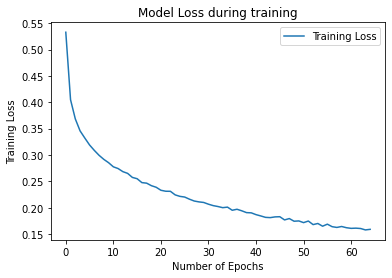

In [22]:
# Visualize the Model Loss during training
plt.plot(epochs_history.history['loss'])
plt.title("Model Loss during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.legend(['Training Loss'])

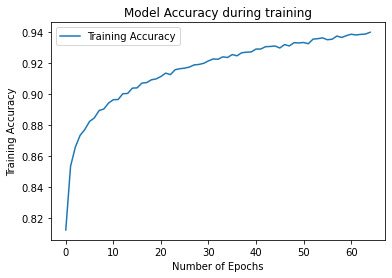

In [23]:
# Visualize the Model Accuracy during training
plt.plot(epochs_history.history['accuracy'])
plt.title("Model Accuracy during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.legend(['Training Accuracy'])

## Model Evaluation and Prediction

In [24]:
# Let's use the model to predict on the test set
test_loss, test_accuracy = model.evaluate(features_test, target_test, verbose=1)
print(f"Test Accuracy - {test_accuracy}")

313/313 [==============================] - 0s 476us/step - loss: 0.4224 - accuracy: 0.8905
Test Accuracy - 0.890500009059906


### Confusion Matrix and Classification Report

In [25]:
target_pred = model.predict(features_test)
# In order to use it in Confusion Matrix because its a multiclass prediction
target_pred = np.argmax(target_pred, axis=1) # Will return the class with the highest probability
target_pred

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
print("Confusion Matrix")
print("\n")
print(confusion_matrix(target_test, target_pred))
print("\n")
print('Classification Report')
print("\n")
print(classification_report(target_test, target_pred))

Confusion Matrix


[[842   1  16  23   4   0 112   0   2   0]
 [  4 969   1  18   4   0   3   0   1   0]
 [ 14   0 841  10  64   0  70   0   1   0]
 [ 20   3   9 911  26   0  27   0   4   0]
 [  0   0 137  36 770   0  57   0   0   0]
 [  0   0   0   1   0 969   0  20   1   9]
 [114   1 101  25  55   1 698   0   5   0]
 [  0   0   0   0   0   9   0 969   0  22]
 [  5   0   5   3   1   2   9   4 971   0]
 [  0   0   0   0   0   6   1  28   0 965]]


Classification Report


              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.84      0.80      1000
           3       0.89      0.91      0.90      1000
           4       0.83      0.77      0.80      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.70      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.97    